In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('nba2k-full.csv')

# Detect salary column
salary_col = None
for col in df.columns:
    if 'salary' in col.lower():
        salary_col = col
        break

if not salary_col:
    raise ValueError("No salary column found.")

# Clean salary
df[salary_col] = df[salary_col].replace('[\$,]', '', regex=True).astype(float)

# Drop unnecessary columns
df = df.drop(columns=['Name', 'Team', 'Jersey', 'Country', 'College', 'Drafted (Pick)', 'Game'], errors='ignore')

# Remove rows with missing salary
df = df.dropna(subset=[salary_col])

# Split into features and target
X = df.drop(columns=[salary_col])
y = df[salary_col]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Save the column names before train/test split (used in Streamlit)
feature_names = list(X.columns)

# Train model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

# Save model and feature names
pickle.dump(model, open('model.sav', 'wb'))
pickle.dump(feature_names, open('model_columns.sav', 'wb'))

print("✅ Model and column names saved!")


NameError: name 'model' is not defined

In [35]:
import pandas as pd
df = pd.read_csv('nba2k-full.csv')

df.head()


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [36]:
df.shape

(464, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [38]:
df = df.dropna()

In [39]:
df.isnull().sum().sum()

np.int64(0)

In [40]:
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college'], axis = 1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15,NBA2k20
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2,NBA2k20
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3,NBA2k20
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7,NBA2k20
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1,NBA2k20


In [41]:
def removehash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(removehash)

In [42]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1,NBA2k20


In [43]:
df['salary'] = df['salary'].apply(removehash)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [44]:
df['team'].value_counts()

team
Brooklyn Nets             17
Los Angeles Clippers      15
Los Angeles Lakers        15
Indiana Pacers            14
Milwaukee Bucks           14
Philadelphia 76ers        14
Orlando Magic             14
New Orleans Pelicans      14
New York Knicks           13
Chicago Bulls             13
Toronto Raptors           13
Minnesota Timberwolves    13
Houston Rockets           13
Memphis Grizzlies         12
Detroit Pistons           12
Sacramento Kings          12
Phoenix Suns              12
Miami Heat                12
San Antonio Spurs         12
Atlanta Hawks             12
Denver Nuggets            12
Golden State Warriors     11
Dallas Mavericks          11
Boston Celtics            11
Portland Trail Blazers    11
Washington Wizards        11
Oklahoma City Thunder     10
Cleveland Cavaliers       10
Utah Jazz                  9
Charlotte Hornets          7
Name: count, dtype: int64

In [45]:
df['country'].value_counts()

country
USA                   315
Canada                 15
Australia               8
Cameroon                5
Nigeria                 3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: count, dtype: int64

In [46]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()
   

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [47]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [48]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [49]:
df['draft_round'].unique

<bound method Series.unique of 1      1
3      1
4      1
5      1
6      1
      ..
457    1
458    1
459    1
460    1
462    1
Name: draft_round, Length: 369, dtype: object>

In [50]:
df['draft_peak'].unique

<bound method Series.unique of 1      15
3       2
4       3
5       7
6       1
       ..
457    27
458    13
459     4
460     3
462    24
Name: draft_peak, Length: 369, dtype: object>

In [51]:
def removeundrafted(value):
    if value=='Undrafted':
        return 
    else:
        return value
    
df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)

df = df.dropna()

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,12,2,32742000,3,2011,1,15,NBA2k20
3,96,7,2,2,37199000,3,2007,1,2,NBA2k20
4,96,13,10,5,38199000,3,2009,1,3,NBA2k20
5,95,30,9,5,40231758,3,2009,1,7,NBA2k20
6,94,3,13,3,27093019,3,2012,1,1,NBA2k20


In [53]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv('nba2k-full.csv')

# --- Step 1: Detect the correct salary column ---
salary_col = None
for col in df.columns:
    if 'salary' in col.lower():
        salary_col = col
        break

if not salary_col:
    raise ValueError("No salary column found.")

# --- Step 2: Clean the salary column ---
# Remove $ and commas, then convert to float
df[salary_col] = df[salary_col].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values in salary or features
df = df.dropna(subset=[salary_col])

# --- Step 3: Drop non-numeric / text-heavy columns that won't help ---
df = df.drop(columns=['Name', 'Team', 'Jersey', 'Country', 'College', 'Drafted (Pick)', 'Game'], errors='ignore')

# --- Step 4: Separate features and target ---
y = df[salary_col]
X = df.drop(columns=[salary_col])

# --- Step 5: Convert categorical variables to numeric (one-hot encoding) ---
X = pd.get_dummies(X)

# --- Step 6: Train-test split ---
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align columns (in case one-hot introduces different sets)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# --- Step 7: Train model ---
lr = LinearRegression()
lr.fit(x_train, y_train)

# --- Step 8: Predict and evaluate ---
predictions = lr.predict(x_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\n✅ Model trained successfully!")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
C:\Users\xc\AppData\Local\Temp\ipykernel_3740\2695675111.py:22: SyntaxWarning: invalid escape sequence '\$'
  df[salary_col] = df[salary_col].replace('[\$,]', '', regex=True).astype(float)



✅ Model trained successfully!
Mean Squared Error: 89901526556984.98
R^2 Score: 0.4479


In [56]:
diff = y_test - predictions

C:\Users\xc\AppData\Local\Temp\ipykernel_3740\1670086357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='salary', ylabel='Density'>

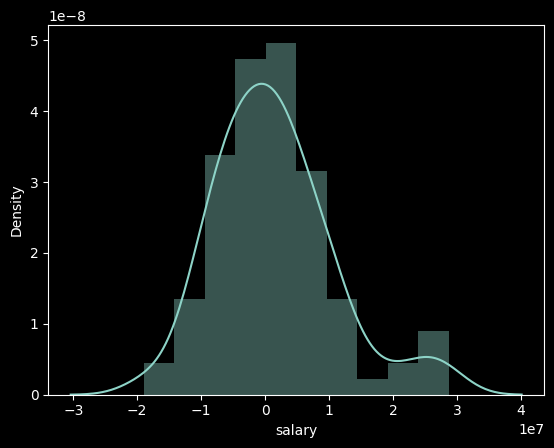

In [57]:
import seaborn as sns
sns.distplot(diff)

In [58]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))